In [1]:
import matplotlib.pylab as plt
import numpy as np
from __future__ import print_function

model = "vangogh2photo"

prev_epoch = 0;
maxsamp = 0;
loss = {};
with open("./log/"+model+"/loss.log") as file:
    for line in file:
        sline = line.rstrip().split(',');
        if (len(sline) == 7):
            prev_epoch = int(sline[0]);
            if (int(sline[1]) > maxsamp):
                maxsamp = int(sline[1]);
            loss[(int(sline[0]),int(sline[1]))] = list(map(float, sline[-5:]));
        elif (len(sline) > 7):
            try:
                print(count);
                if (int(float(sline[-6])) > maxsamp):
                    maxsamp = int(sline[-6]);
                loss[(int(prev_epoch+1),int(float(sline[-6])))] = list(map(float, sline[-5:]));
            catch:
                pass

print(maxsamp);
lossmeans = []
for i in range(0,200):
    sumnum = [0,0,0,0,0];
    count = 1;
    for j in range(0,maxsamp):
        if ((i,j) in loss):
            sumnum = np.add(sumnum,loss[(i,j)]);
            count = count+1;
        else:
            count = 1;
            break;
    if (count != 1):
        lossmeans.append(np.divide(sumnum, count-1).tolist());
    else:
        lossmeans.append(np.add([0,0,0,0,0], -1).tolist());
        
for i in range(0,200):
    if (lossmeans[i][0] < 0):
        j = 1
        while (lossmeans[i+j][0] < 0):
            j = j+1
        #print(">"+str(j)+">",end="")
        for k in range(i,i+j):
            lossmeans[k][0] = lossmeans[i-1][0]-(k - i + 1)*(lossmeans[i-1][0] - lossmeans[i+j][0])/(j+1);
            lossmeans[k][1] = lossmeans[i-1][1]-(k - i + 1)*(lossmeans[i-1][1] - lossmeans[i+j][1])/(j+1);
            lossmeans[k][2] = lossmeans[i-1][2]-(k - i + 1)*(lossmeans[i-1][2] - lossmeans[i+j][2])/(j+1);
            lossmeans[k][3] = lossmeans[i-1][3]-(k - i + 1)*(lossmeans[i-1][3] - lossmeans[i+j][3])/(j+1);
            lossmeans[k][4] = lossmeans[i-1][4]-(k - i + 1)*(lossmeans[i-1][4] - lossmeans[i+j][4])/(j+1);
    #print(lossmeans[i])
    


20232
100468
199723
279132
299000
398257
596406
674345
752284
830223
908162
986101
1044574
1064053
1103020
1161459
6286


/opt/conda/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


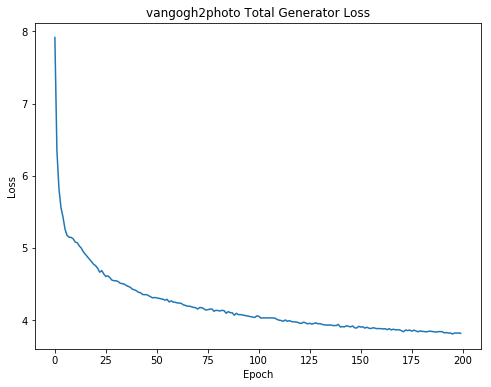

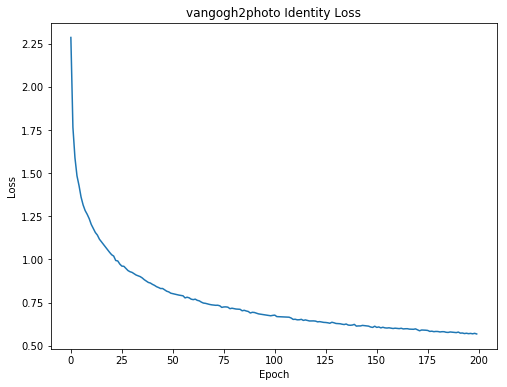

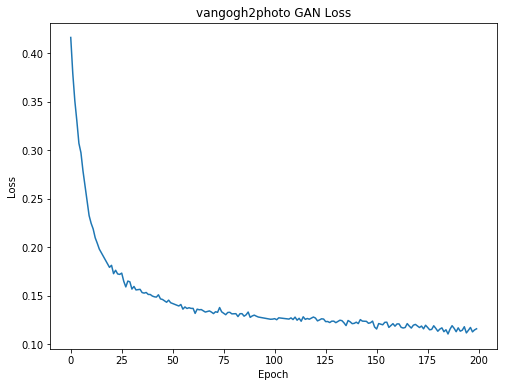

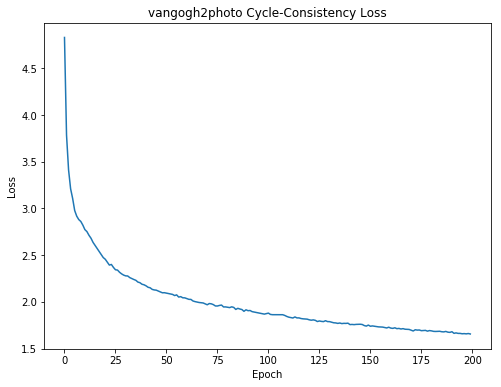

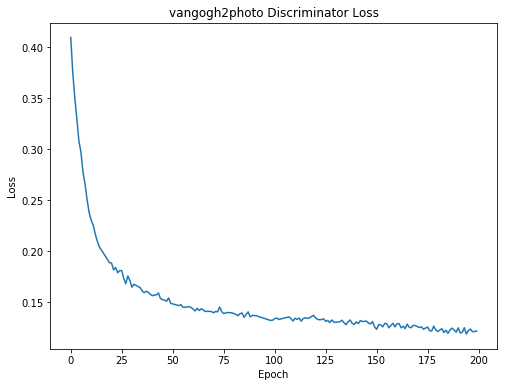

In [2]:
import os.path;
path = "./lossplots/"+model + "/";
if not os.path.exists(path):
    os.makedirs(path);

losses = np.array(lossmeans);
titles = ["Total Generator Loss", "Identity Loss", "GAN Loss", "Cycle-Consistency Loss", "Discriminator Loss"];
filenames = ["gen_loss.png", "ident_loss.png", "gan_loss.png", "cc_loss.png", "d_loss.png"];
plots = []
for i in range(0,5):
    plots.append(plt.figure(i, figsize=(8,6)));
    col = losses[:,i];
    plt.plot(range(0,200), col)
    plt.xlabel('Epoch');
    plt.ylabel('Loss');
    plt.title(model + " " + titles[i]);
    plots[i].show();
    plt.savefig(path + filenames[i], bbox_inches='tight')
